# Tugas 4 - Data Mining: Association Rules

## Studi Kasus: Analisis Pola Pemesanan di Cafe "Kopi Senja"

### Import Libraries

In [40]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('Solarize_Light2')

### Define Dataset

In [41]:
responden = [
    'Dinunaya Syuja Aryoko',
    'Ahmad Arya Dwi Febriansyah',
    'Vito Agatha Satritama',
    'Moh. Dani Wahyudi',
    'Achmad Wildan Muzaky',
    'Frenky',
    'Andries Nauvalentin Roestam',
    'Muhammad Alvin Firdaus',
    'Husni Mubarok',
    'Abiyyu Valin Zavero'
]

transactions = [
    ['Kopi Susu', 'Roti Bakar', 'Keripik Kentang'],
    ['Cappuccino', 'Croissant', 'Air Mineral'],
    ['Kopi Hitam', 'Roti Bakar', 'Keripik Kentang', 'Biskuit'],
    ['Kopi Susu', 'Roti Bakar', 'Jus Jeruk'],
    ['Teh Manis', 'Donut', 'Air Mineral'],
    ['Cappuccino', 'Croissant', 'Keripik Kentang'],
    ['Kopi Susu', 'Roti Bakar', 'Donut'],
    ['Latte', 'Nasi Goreng', 'Air Mineral'],
    ['Kopi Hitam', 'Roti Bakar', 'Keripik Kentang'],
    ['Teh Manis', 'Donut', 'Kue Coklat']
]

df_transaksi = pd.DataFrame({
    'Responden': responden,
    'Item': transactions
})

print("Dataset Transaksi:")
print(df_transaksi)
print(f"\nTotal Transaksi: {len(transactions)}")

Dataset Transaksi:
                     Responden  \
0        Dinunaya Syuja Aryoko   
1   Ahmad Arya Dwi Febriansyah   
2        Vito Agatha Satritama   
3            Moh. Dani Wahyudi   
4         Achmad Wildan Muzaky   
5                       Frenky   
6  Andries Nauvalentin Roestam   
7       Muhammad Alvin Firdaus   
8                Husni Mubarok   
9          Abiyyu Valin Zavero   

                                                Item  
0           [Kopi Susu, Roti Bakar, Keripik Kentang]  
1               [Cappuccino, Croissant, Air Mineral]  
2  [Kopi Hitam, Roti Bakar, Keripik Kentang, Bisk...  
3                 [Kopi Susu, Roti Bakar, Jus Jeruk]  
4                    [Teh Manis, Donut, Air Mineral]  
5           [Cappuccino, Croissant, Keripik Kentang]  
6                     [Kopi Susu, Roti Bakar, Donut]  
7                  [Latte, Nasi Goreng, Air Mineral]  
8          [Kopi Hitam, Roti Bakar, Keripik Kentang]  
9                     [Teh Manis, Donut, Kue Coklat]  



### Data Preprocessing

In [22]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

print("Binary Encoded Matrix:")
print(df)
print(f"\nJumlah Item Unik: {len(te.columns_)}")
print(f"\nDaftar Item: {list(te.columns_)}")

Binary Encoded Matrix:
   Air Mineral  Biskuit  Cappuccino  Croissant  Donut  Jus Jeruk  \
0        False    False       False      False  False      False   
1         True    False        True       True  False      False   
2        False     True       False      False  False      False   
3        False    False       False      False  False       True   
4         True    False       False      False   True      False   
5        False    False        True       True  False      False   
6        False    False       False      False   True      False   
7         True    False       False      False  False      False   
8        False    False       False      False  False      False   
9        False    False       False      False   True      False   

   Keripik Kentang  Kopi Hitam  Kopi Susu  Kue Coklat  Latte  Nasi Goreng  \
0             True       False       True       False  False        False   
1            False       False      False       False  False        False 

### Exploratory Data Analysis

In [42]:
item_counts = df.sum().sort_values(ascending=False)

print("Frekuensi Kemunculan Item:")
for item, count in item_counts.items():
    print(f"{item}: {count}")

Frekuensi Kemunculan Item:
Roti Bakar: 5
Keripik Kentang: 4
Air Mineral: 3
Kopi Susu: 3
Donut: 3
Croissant: 2
Teh Manis: 2
Kopi Hitam: 2
Cappuccino: 2
Biskuit: 1
Jus Jeruk: 1
Kue Coklat: 1
Nasi Goreng: 1
Latte: 1


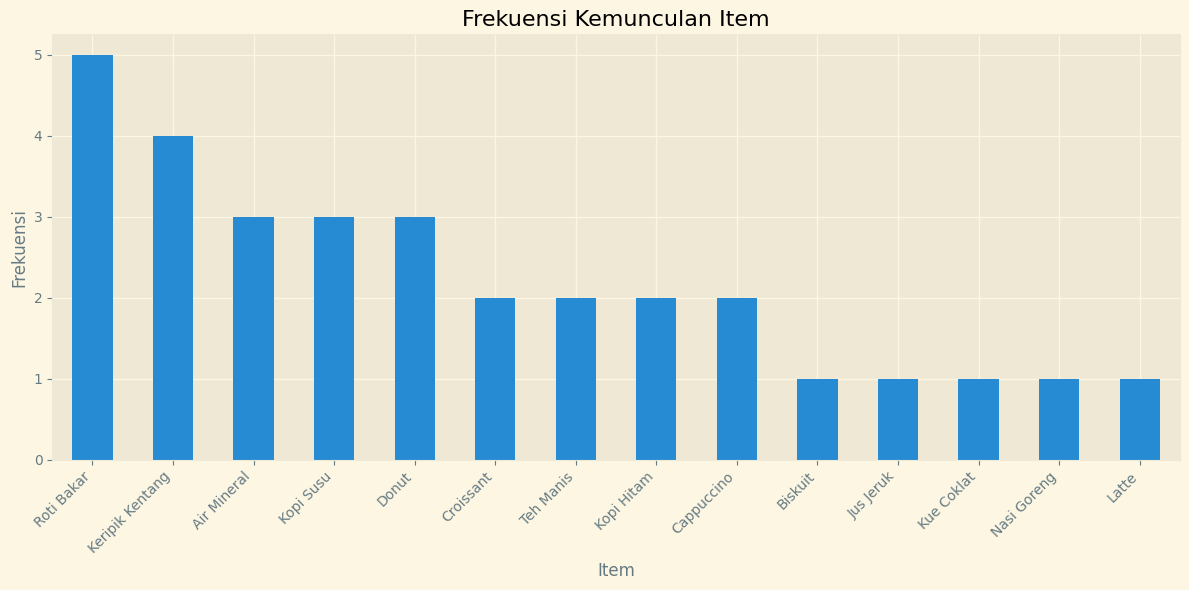

In [24]:
plt.figure(figsize=(12, 6))
item_counts.plot(kind='bar')
plt.title('Frekuensi Kemunculan Item')
plt.xlabel('Item')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
print("\nStatistik Deskriptif:")
print(f"Total Item Terjual: {df.sum().sum()}")
print(f"Rata-rata Item per Transaksi: {df.sum().mean():.2f}")
print(f"Minimum Item per Transaksi: {df.sum(axis=1).min()}")
print(f"Maximum Item per Transaksi: {df.sum(axis=1).max()}")


Statistik Deskriptif:
Total Item Terjual: 31
Rata-rata Item per Transaksi: 2.21
Minimum Item per Transaksi: 3
Maximum Item per Transaksi: 4


---
## ALGORITMA APRIORI
---

### Apriori - Manual Calculation

**Parameter:**
- Minimum Support: 30% (0.3)
- Minimum Support Count: 10 × 0.3 = 3 transaksi

In [44]:
def manual_apriori(transactions, min_support=0.3):
    n = len(transactions)
    min_support_count = int(n * min_support)
    
    print(f"Total Transaksi: {n}")
    print(f"Minimum Support: {min_support}")
    print(f"Minimum Support Count: {min_support_count}\n")
    
    # C1: Candidate 1-itemset
    c1 = {}
    for trans in transactions:
        for item in trans:
            if item not in c1:
                c1[item] = 1
            else:
                c1[item] += 1
    
    print("=== C1 (Candidate 1-itemset) ===")
    df_c1 = pd.DataFrame(list(c1.items()), columns=['Item', 'Count'])
    df_c1['Support'] = df_c1['Count'] / n
    print(df_c1.to_string(index=False))
    
    # L1: Frequent 1-itemset
    l1 = {k: v for k, v in c1.items() if v >= min_support_count}
    
    print(f"\n=== L1 (Frequent 1-itemset) - Support >= {min_support} ===")
    df_l1 = pd.DataFrame(list(l1.items()), columns=['Item', 'Count'])
    df_l1['Support'] = df_l1['Count'] / n
    print(df_l1.to_string(index=False))
    
    # C2: Candidate 2-itemset
    l1_items = list(l1.keys())
    c2 = {}
    
    for i in range(len(l1_items)):
        for j in range(i+1, len(l1_items)):
            itemset = frozenset([l1_items[i], l1_items[j]])
            count = 0
            for trans in transactions:
                if itemset.issubset(set(trans)):
                    count += 1
            c2[itemset] = count
    
    print(f"\n=== C2 (Candidate 2-itemset) ===")
    df_c2 = pd.DataFrame([(tuple(k), v) for k, v in c2.items()], columns=['Itemset', 'Count'])
    df_c2['Support'] = df_c2['Count'] / n
    print(df_c2.to_string(index=False))
    
    # L2: Frequent 2-itemset
    l2 = {k: v for k, v in c2.items() if v >= min_support_count}
    
    print(f"\n=== L2 (Frequent 2-itemset) - Support >= {min_support} ===")
    if l2:
        df_l2 = pd.DataFrame([(tuple(k), v) for k, v in l2.items()], columns=['Itemset', 'Count'])
        df_l2['Support'] = df_l2['Count'] / n
        print(df_l2.to_string(index=False))
    else:
        print("Tidak ada frequent 2-itemset yang ditemukan.")
        
    return c1, l1, c2, l2

c1, l1, c2, l2 = manual_apriori(transactions, min_support=0.3)

Total Transaksi: 10
Minimum Support: 0.3
Minimum Support Count: 3

=== C1 (Candidate 1-itemset) ===
           Item  Count  Support
      Kopi Susu      3      0.3
     Roti Bakar      5      0.5
Keripik Kentang      4      0.4
     Cappuccino      2      0.2
      Croissant      2      0.2
    Air Mineral      3      0.3
     Kopi Hitam      2      0.2
        Biskuit      1      0.1
      Jus Jeruk      1      0.1
      Teh Manis      2      0.2
          Donut      3      0.3
          Latte      1      0.1
    Nasi Goreng      1      0.1
     Kue Coklat      1      0.1

=== L1 (Frequent 1-itemset) - Support >= 0.3 ===
           Item  Count  Support
      Kopi Susu      3      0.3
     Roti Bakar      5      0.5
Keripik Kentang      4      0.4
    Air Mineral      3      0.3
          Donut      3      0.3

=== C2 (Candidate 2-itemset) ===
                       Itemset  Count  Support
       (Roti Bakar, Kopi Susu)      3      0.3
  (Keripik Kentang, Kopi Susu)      1      0.1
   

### Apriori - Python Implementation (mlxtend)

In [45]:
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

print("=== Frequent Itemsets (Apriori) ===")
print(frequent_itemsets)

print("\n=== Frequent Itemsets by Length ===")
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets.sort_values(['length', 'support'], ascending=[True, False]))

=== Frequent Itemsets (Apriori) ===
   support                       itemsets
0      0.3                  (Air Mineral)
1      0.3                        (Donut)
2      0.4              (Keripik Kentang)
3      0.3                    (Kopi Susu)
4      0.5                   (Roti Bakar)
5      0.3  (Roti Bakar, Keripik Kentang)
6      0.3        (Roti Bakar, Kopi Susu)

=== Frequent Itemsets by Length ===
   support                       itemsets  length
4      0.5                   (Roti Bakar)       1
2      0.4              (Keripik Kentang)       1
0      0.3                  (Air Mineral)       1
1      0.3                        (Donut)       1
3      0.3                    (Kopi Susu)       1
5      0.3  (Roti Bakar, Keripik Kentang)       2
6      0.3        (Roti Bakar, Kopi Susu)       2


In [28]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print("=== Association Rules (Apriori) ===")
print("Metric: Confidence >= 70%")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_string(index=False))

=== Association Rules (Apriori) ===
Metric: Confidence >= 70%
      antecedents  consequents  support  confidence  lift
(Keripik Kentang) (Roti Bakar)      0.3        0.75   1.5
      (Kopi Susu) (Roti Bakar)      0.3        1.00   2.0


In [29]:
rules_sorted = rules.sort_values(['lift', 'confidence'], ascending=[False, False])
print("=== Top 5 Rules berdasarkan Lift dan Confidence ===")
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head().to_string(index=False))

=== Top 5 Rules berdasarkan Lift dan Confidence ===
      antecedents  consequents  support  confidence  lift
      (Kopi Susu) (Roti Bakar)      0.3        1.00   2.0
(Keripik Kentang) (Roti Bakar)      0.3        0.75   1.5


---
## ALGORITMA FP-GROWTH
---

### FP-Growth - Manual Calculation

In [30]:
def manual_fpgrowth(transactions, min_support=0.3):
    n = len(transactions)
    min_support_count = int(n * min_support)
    
    print(f"=== FP-Growth Manual Calculation ===")
    print(f"Total Transaksi: {n}")
    print(f"Minimum Support: {min_support}")
    print(f"Minimum Support Count: {min_support_count}\n")
    
    # Step 1: Frequent 1-itemset (sorted by frequency)
    item_freq = {}
    for trans in transactions:
        for item in trans:
            item_freq[item] = item_freq.get(item, 0) + 1
    
    frequent_items = {k: v for k, v in item_freq.items() if v >= min_support_count}
    sorted_items = sorted(frequent_items.items(), key=lambda x: x[1], reverse=True)
    
    print("=== Frequent 1-itemset (Sorted) ===")
    for item, freq in sorted_items:
        print(f"{item}: {freq} ({freq/n:.2f})")
    
    item_rank = {item: rank for rank, (item, _) in enumerate(sorted_items)}
    
    # Step 2: Sort transactions
    ordered_transactions = []
    for trans in transactions:
        ordered = [item for item in trans if item in item_rank]
        ordered.sort(key=lambda x: item_rank[x])
        ordered_transactions.append(ordered)
    
    print("\n=== Ordered Transactions ===")
    for i, trans in enumerate(ordered_transactions, 1):
        print(f"T{i}: {trans}")
    
    # Step 3: Build FP-Tree (simplified representation)
    print("\n=== FP-Tree Structure ===")
    
    fp_tree = {}
    for trans in ordered_transactions:
        current_level = fp_tree
        for item in trans:
            if item not in current_level:
                current_level[item] = {'count': 1, 'children': {}}
            else:
                current_level[item]['count'] += 1
            current_level = current_level[item]['children']
    
    def print_tree(node, prefix=""):
        for item, data in node.items():
            print(f"{prefix}{item} (count: {data['count']})")
            if data['children']:
                print_tree(data['children'], prefix + "  ")
    
    print_tree(fp_tree)
    
    return frequent_items, ordered_transactions, fp_tree

frequent_items_fp, ordered_trans, fp_tree = manual_fpgrowth(transactions, min_support=0.3)

=== FP-Growth Manual Calculation ===
Total Transaksi: 10
Minimum Support: 0.3
Minimum Support Count: 3

=== Frequent 1-itemset (Sorted) ===
Roti Bakar: 5 (0.50)
Keripik Kentang: 4 (0.40)
Kopi Susu: 3 (0.30)
Air Mineral: 3 (0.30)
Donut: 3 (0.30)

=== Ordered Transactions ===
T1: ['Roti Bakar', 'Keripik Kentang', 'Kopi Susu']
T2: ['Air Mineral']
T3: ['Roti Bakar', 'Keripik Kentang']
T4: ['Roti Bakar', 'Kopi Susu']
T5: ['Air Mineral', 'Donut']
T6: ['Keripik Kentang']
T7: ['Roti Bakar', 'Kopi Susu', 'Donut']
T8: ['Air Mineral']
T9: ['Roti Bakar', 'Keripik Kentang']
T10: ['Donut']

=== FP-Tree Structure ===
Roti Bakar (count: 5)
  Keripik Kentang (count: 3)
    Kopi Susu (count: 1)
  Kopi Susu (count: 2)
    Donut (count: 1)
Air Mineral (count: 3)
  Donut (count: 1)
Keripik Kentang (count: 1)
Donut (count: 1)


### FP-Growth - Python Implementation (mlxtend)

In [31]:
frequent_itemsets_fpgrowth = fpgrowth(df, min_support=0.3, use_colnames=True)

print("=== Frequent Itemsets (FP-Growth) ===")
print(frequent_itemsets_fpgrowth)

print("\n=== Frequent Itemsets by Length ===")
frequent_itemsets_fpgrowth['length'] = frequent_itemsets_fpgrowth['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets_fpgrowth.sort_values(['length', 'support'], ascending=[True, False]))

=== Frequent Itemsets (FP-Growth) ===
   support                       itemsets
0      0.5                   (Roti Bakar)
1      0.4              (Keripik Kentang)
2      0.3                    (Kopi Susu)
3      0.3                  (Air Mineral)
4      0.3                        (Donut)
5      0.3  (Roti Bakar, Keripik Kentang)
6      0.3        (Roti Bakar, Kopi Susu)

=== Frequent Itemsets by Length ===
   support                       itemsets  length
0      0.5                   (Roti Bakar)       1
1      0.4              (Keripik Kentang)       1
2      0.3                    (Kopi Susu)       1
3      0.3                  (Air Mineral)       1
4      0.3                        (Donut)       1
5      0.3  (Roti Bakar, Keripik Kentang)       2
6      0.3        (Roti Bakar, Kopi Susu)       2


In [32]:
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.7)

print("=== Association Rules (FP-Growth) ===")
print("Metric: Confidence >= 70%")
print(rules_fpgrowth[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_string(index=False))

=== Association Rules (FP-Growth) ===
Metric: Confidence >= 70%
      antecedents  consequents  support  confidence  lift
(Keripik Kentang) (Roti Bakar)      0.3        0.75   1.5
      (Kopi Susu) (Roti Bakar)      0.3        1.00   2.0


In [33]:
rules_fpgrowth_sorted = rules_fpgrowth.sort_values(['lift', 'confidence'], ascending=[False, False])
print("=== Top 5 Rules berdasarkan Lift dan Confidence ===")
print(rules_fpgrowth_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head().to_string(index=False))

=== Top 5 Rules berdasarkan Lift dan Confidence ===
      antecedents  consequents  support  confidence  lift
      (Kopi Susu) (Roti Bakar)      0.3        1.00   2.0
(Keripik Kentang) (Roti Bakar)      0.3        0.75   1.5


---
## PERBANDINGAN HASIL
---

In [34]:
print("=== Perbandingan Frequent Itemsets: Apriori vs FP-Growth ===")
comparison = pd.DataFrame({
    'Apriori': frequent_itemsets.sort_values('support', ascending=False).reset_index(drop=True)['support'],
    'FP-Growth': frequent_itemsets_fpgrowth.sort_values('support', ascending=False).reset_index(drop=True)['support']
})
print(comparison)
print(f"\nApakah hasil sama? {frequent_itemsets.equals(frequent_itemsets_fpgrowth)}")

=== Perbandingan Frequent Itemsets: Apriori vs FP-Growth ===
   Apriori  FP-Growth
0      0.5        0.5
1      0.4        0.4
2      0.3        0.3
3      0.3        0.3
4      0.3        0.3
5      0.3        0.3
6      0.3        0.3

Apakah hasil sama? False


In [35]:
print("=== Perbandingan Rules: Apriori vs FP-Growth ===")
rules_comparison = pd.DataFrame({
    'Apriori Count': len(rules),
    'FP-Growth Count': len(rules_fpgrowth)
}, index=['Jumlah Rules'])
print(rules_comparison)

=== Perbandingan Rules: Apriori vs FP-Growth ===
              Apriori Count  FP-Growth Count
Jumlah Rules              2                2


---
## TOP 4 ASSOCIATION RULES
---

In [36]:
top4_rules = rules.sort_values(['lift', 'confidence'], ascending=[False, False]).head(4)

print("=== TOP 4 ASSOCIATION RULES ===")
for idx, row in top4_rules.iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    print(f"\nRule {idx+1}:")
    print(f"  {antecedents} -> {consequents}")
    print(f"  Support: {row['support']:.4f} ({row['support']*100:.2f}%)")
    print(f"  Confidence: {row['confidence']:.4f} ({row['confidence']*100:.2f}%)")
    print(f"  Lift: {row['lift']:.4f}")
    
    if row['lift'] > 1:
        print(f"  Interpretasi: Positive correlation (lift > 1)")
    elif row['lift'] == 1:
        print(f"  Interpretasi: No correlation (lift = 1)")
    else:
        print(f"  Interpretasi: Negative correlation (lift < 1)")

=== TOP 4 ASSOCIATION RULES ===

Rule 2:
  Kopi Susu -> Roti Bakar
  Support: 0.3000 (30.00%)
  Confidence: 1.0000 (100.00%)
  Lift: 2.0000
  Interpretasi: Positive correlation (lift > 1)

Rule 1:
  Keripik Kentang -> Roti Bakar
  Support: 0.3000 (30.00%)
  Confidence: 0.7500 (75.00%)
  Lift: 1.5000
  Interpretasi: Positive correlation (lift > 1)


---
## VISUALISASI RULES
---

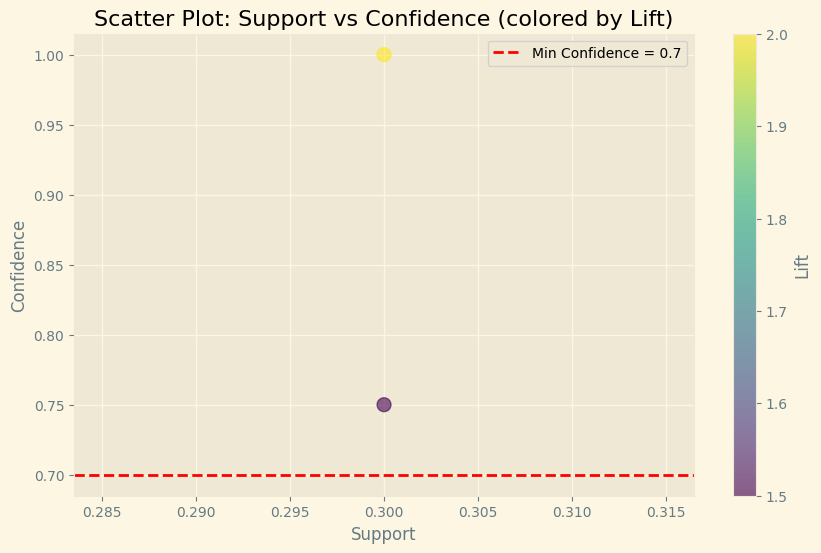

In [37]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(rules['support'], rules['confidence'], 
                      c=rules['lift'], s=100, alpha=0.6, cmap='viridis')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Scatter Plot: Support vs Confidence (colored by Lift)')
plt.colorbar(scatter, label='Lift')
plt.axhline(y=0.7, color='r', linestyle='--', label='Min Confidence = 0.7')
plt.legend()
plt.show()

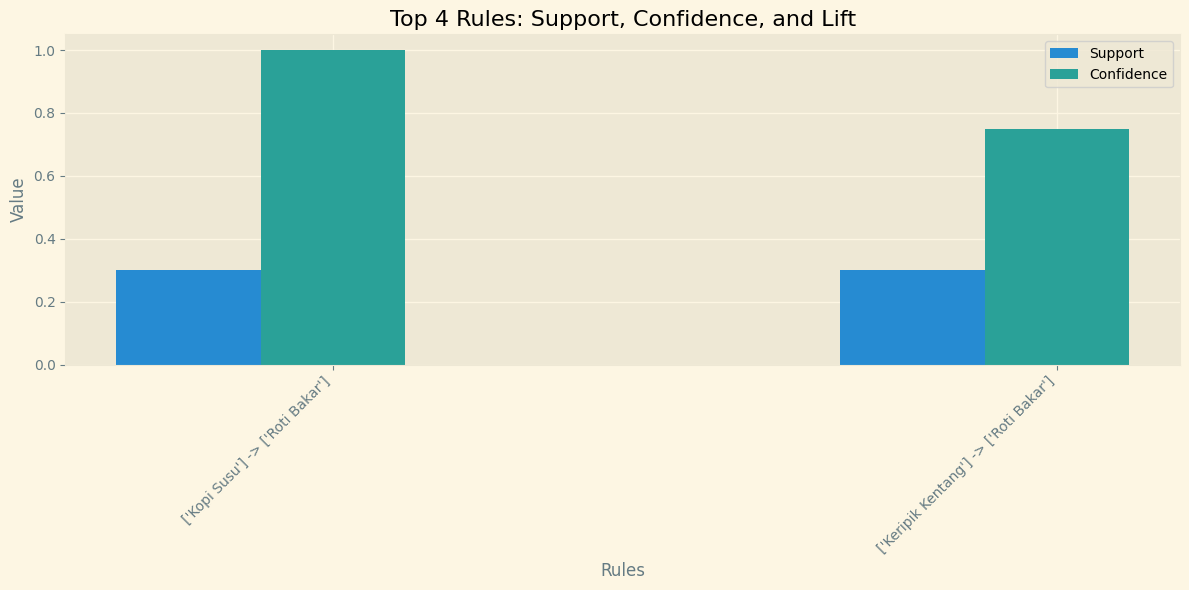

In [38]:
top4_rules_plot = top4_rules.copy()
top4_rules_plot['rule'] = [f"{list(r['antecedents'])} -> {list(r['consequents'])}" 
                            for _, r in top4_rules_plot.iterrows()]

plt.figure(figsize=(12, 6))
x_pos = np.arange(len(top4_rules_plot))
plt.bar(x_pos - 0.2, top4_rules_plot['support'], 0.2, label='Support')
plt.bar(x_pos, top4_rules_plot['confidence'], 0.2, label='Confidence')
plt.xlabel('Rules')
plt.ylabel('Value')
plt.title('Top 4 Rules: Support, Confidence, and Lift')
plt.xticks(x_pos, top4_rules_plot['rule'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

---
## KESIMPULAN
---

In [39]:
print("=== KESIMPULAN ANALISIS ===")
print(f"\n1. Total Transaksi: {len(transactions)}")
print(f"2. Total Item Unik: {len(te.columns_)}")
print(f"3. Frequent Itemsets Found: {len(frequent_itemsets)}")
print(f"4. Association Rules Found: {len(rules)}")
print(f"5. Top Rules with Lift > 1: {len(rules[rules['lift'] > 1])}")

print("\n=== Rekomendasi Bisnis ===")
print("\n1. Cross-Selling Strategy:")
for idx, row in top4_rules.head(2).iterrows():
    ant = list(row['antecedents'])
    cons = list(row['consequents'])
    print(f"   - Saat pelanggan membeli {ant}, tawarkan {cons}")

print("\n2. Penempatan Menu:")
print("   - Letakkan item yang sering dibeli bersama di lokasi yang berdekatan")
print("   - Tampilkan paket promosi dengan kombinasi item yang memiliki lift tinggi")

print("\n3. Manajemen Stok:")
print("   - Pastikan ketersediaan stok untuk item yang sering dibeli bersama")
print("   - Hindari kekosongan stok pada item dengan frekuensi tinggi")

=== KESIMPULAN ANALISIS ===

1. Total Transaksi: 10
2. Total Item Unik: 14
3. Frequent Itemsets Found: 7
4. Association Rules Found: 2
5. Top Rules with Lift > 1: 2

=== Rekomendasi Bisnis ===

1. Cross-Selling Strategy:
   - Saat pelanggan membeli ['Kopi Susu'], tawarkan ['Roti Bakar']
   - Saat pelanggan membeli ['Keripik Kentang'], tawarkan ['Roti Bakar']

2. Penempatan Menu:
   - Letakkan item yang sering dibeli bersama di lokasi yang berdekatan
   - Tampilkan paket promosi dengan kombinasi item yang memiliki lift tinggi

3. Manajemen Stok:
   - Pastikan ketersediaan stok untuk item yang sering dibeli bersama
   - Hindari kekosongan stok pada item dengan frekuensi tinggi
